# Determine DEGs in Deseq2 Data

### 1. Import Required Packages
### 2. Import Data
### 3. Concat All Data Into One Dataframe


## <br> 1. Import Required Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gseapy as gp

Set figure parameters.

In [3]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'
pd.options.display.max_colwidth = 200
#plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['pdf.fonttype'] = 'truetype'

## <br> 2. Import Previous Enrichr Analyses

In [4]:
Enrichr_All_DEGs_MASTER_Wald = pd.read_csv('./Results/Enrichr_All_DEGs_MASTER.txt', 
                                            delimiter = '\t', index_col=0)


Enrichr_Unique_to_Celltype_MASTER_Wald = pd.read_csv('./Results/Enrichr_Unique_to_Celltype_MASTER.txt', 
                                               delimiter = '\t', index_col=0)


In [5]:
Enrichr_All_DEGs_MASTER_Wald

,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Celltype
0,BIOCARTA_MM_ACUTE_MYOCARDIAL_INFARCTION,1/8,0.106867,0.239933,12.623529,28.228344,Fga,B_Cell
1,BIOCARTA_MM_AKT_SIGNALING_PATHWAY,1/15,0.191031,0.317764,6.917268,11.450299,Ghr,B_Cell
2,BIOCARTA_MM_CARM1_AND_REGULATION_OF_THE_ESTROGEN_RECEPTOR,1/22,0.267319,0.383303,4.761569,6.281992,Esr1,B_Cell
3,BIOCARTA_MM_CD40L_SIGNALING_PATHWAY,1/12,0.155970,0.285197,8.580235,15.942858,Traf3,B_Cell
4,BIOCARTA_MM_DOWNREGULATED_OF_MTA-3_IN_ER-NEGATIVE_BREAST_TUMORS,1/9,0.119402,0.252348,11.293498,24.001581,Esr1,B_Cell
...,...,...,...,...,...,...,...,...
44528,WIKIPATHWAYS_MM_TNF_ALPHA_SIGNALING_PATHWAY-WP231,1/70,0.646342,0.689262,1.443377,0.629927,Ikbkg,T_Cell
44529,WIKIPATHWAYS_MM_TOLL-LIKE_RECEPTOR_SIGNALING_PATHWAY-WP75,1/51,0.530709,0.592917,1.979852,1.254319,Ikbkg,T_Cell
44530,WIKIPATHWAYS_MM_TRIACYLGLYCERIDE_SYNTHESIS-WP325,1/17,0.222540,0.363021,5.847312,8.786449,Plpp3,T_Cell
44531,WIKIPATHWAYS_MM_TRYPTOPHAN_METABOLISM-WP465,4/34,0.001468,0.045283,9.077401,59.220959,Tdo2;Aox1;Cyp1a2;Cyp1a1,T_Cell


In [6]:
Enrichr_All_DEGs_MASTER_Wald['Celltype'].unique()

array(['B_Cell', 'Cholangiocyte', 'Hepatocyte', 'HSC', 'EC', 'Macrophage',
       'pDC', 'PF', 'T_Cell'], dtype=object)

In [7]:
Enrichr_Unique_to_Celltype_MASTER_Wald

,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Celltype
0,BIOCARTA_MM_CARM1_AND_REGULATION_OF_THE_ESTROGEN_RECEPTOR,1/22,0.011995,0.023200,134.911111,596.742032,Esr1,B_Cell
1,BIOCARTA_MM_DOWNREGULATED_OF_MTA-3_IN_ER-NEGATIVE_BREAST_TUMORS,1/9,0.004921,0.017719,319.982456,1700.448411,Esr1,B_Cell
2,BIOCARTA_MM_ROLE_OF_ERBB2_IN_SIGNAL_TRANSDUCTION_AND_ONCOLOGY,1/17,0.009279,0.020510,173.552381,812.217697,Esr1,B_Cell
3,EHMN_MM_BILE_ACID_BIOSYNTHESIS,1/30,0.016329,0.026594,99.437158,409.166213,Scp2,B_Cell
4,EHMN_MM_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIOSERIES,1/9,0.004921,0.017719,319.982456,1700.448411,St3gal5,B_Cell
...,...,...,...,...,...,...,...,...
22638,TF_MM_FRIARD_MEIS1,1/192,0.098217,0.146378,15.655962,36.330872,St18,Macrophage
22639,TZ_DIURNAL_GENES,1/4551,0.955589,0.955589,0.400957,0.018214,Usp12,Macrophage
22640,TZ_SCS_MACROPHAGES,4/896,0.000528,0.025885,20.773787,156.780397,Amz1;Usp12;Mgat4a;Tbxas1,Macrophage
22641,WIKIPATHWAYS_MM_EICOSANOID_SYNTHESIS-WP167,1/13,0.006920,0.058022,226.858586,1128.252161,Tbxas1,Macrophage


In [8]:
Enrichr_Unique_to_Celltype_MASTER_Wald['Celltype'].unique()

array(['B_Cell', 'Cholangiocyte', 'Hepatocyte', 'HSC', 'EC', 'Macrophage'],
      dtype=object)

## <br> 3A. Plot for All DEGs for KEGG Terms (Enrichr_All_DEGs_MASTER_Wald)

In [10]:
subset = Enrichr_All_DEGs_MASTER_Wald[Enrichr_All_DEGs_MASTER_Wald['Term'].str.contains('KEGG')]
subset = subset[subset['Adjusted P-value'] <= 0.05]
subset = subset.sort_values('Adjusted P-value')
subset['Size'] = subset['Adjusted P-value'].apply(lambda x: 300 if x == 0 else 10 + ((0.05 - x) / 0.05) * 290)

# Create a mapping dictionary for Celltype to X_COOR values
celltype_mapping = {
    'Hepatocyte': 1,
    'EC': 2,
    'HSC': 3,
    'Macrophage': 4,
    'B_Cell': 5,
    'T_Cell': 6,
    'PF': 7,
    'Cholangiocyte': 8,
    'pDC': 9,
}

subset['X_COOR'] = subset['Celltype'].map(celltype_mapping)


color_mapping = {
    'Hepatocyte': '#db5f57',
    'EC': '#dbae57',
    'HSC': '#b9db57',
    'Macrophage': '#69db57',
    'B_Cell': '#57db94',
    'T_Cell': '#57d3db',
    'PF': '#5784db',
    'Cholangiocyte': '#7957db',
    'pDC': '#c957db',
    'Neutrophil': '#db579e'
}

subset['Color'] = subset['Celltype'].map(color_mapping)


from fractions import Fraction

subset['Overlap_Decimal'] = subset['Overlap'].apply(lambda x: float(eval(x)) if '/' in x else float(x))

subset
subset.to_csv('./Results/All_DEGs_KEGG_subset.txt', sep='\t', index=False)

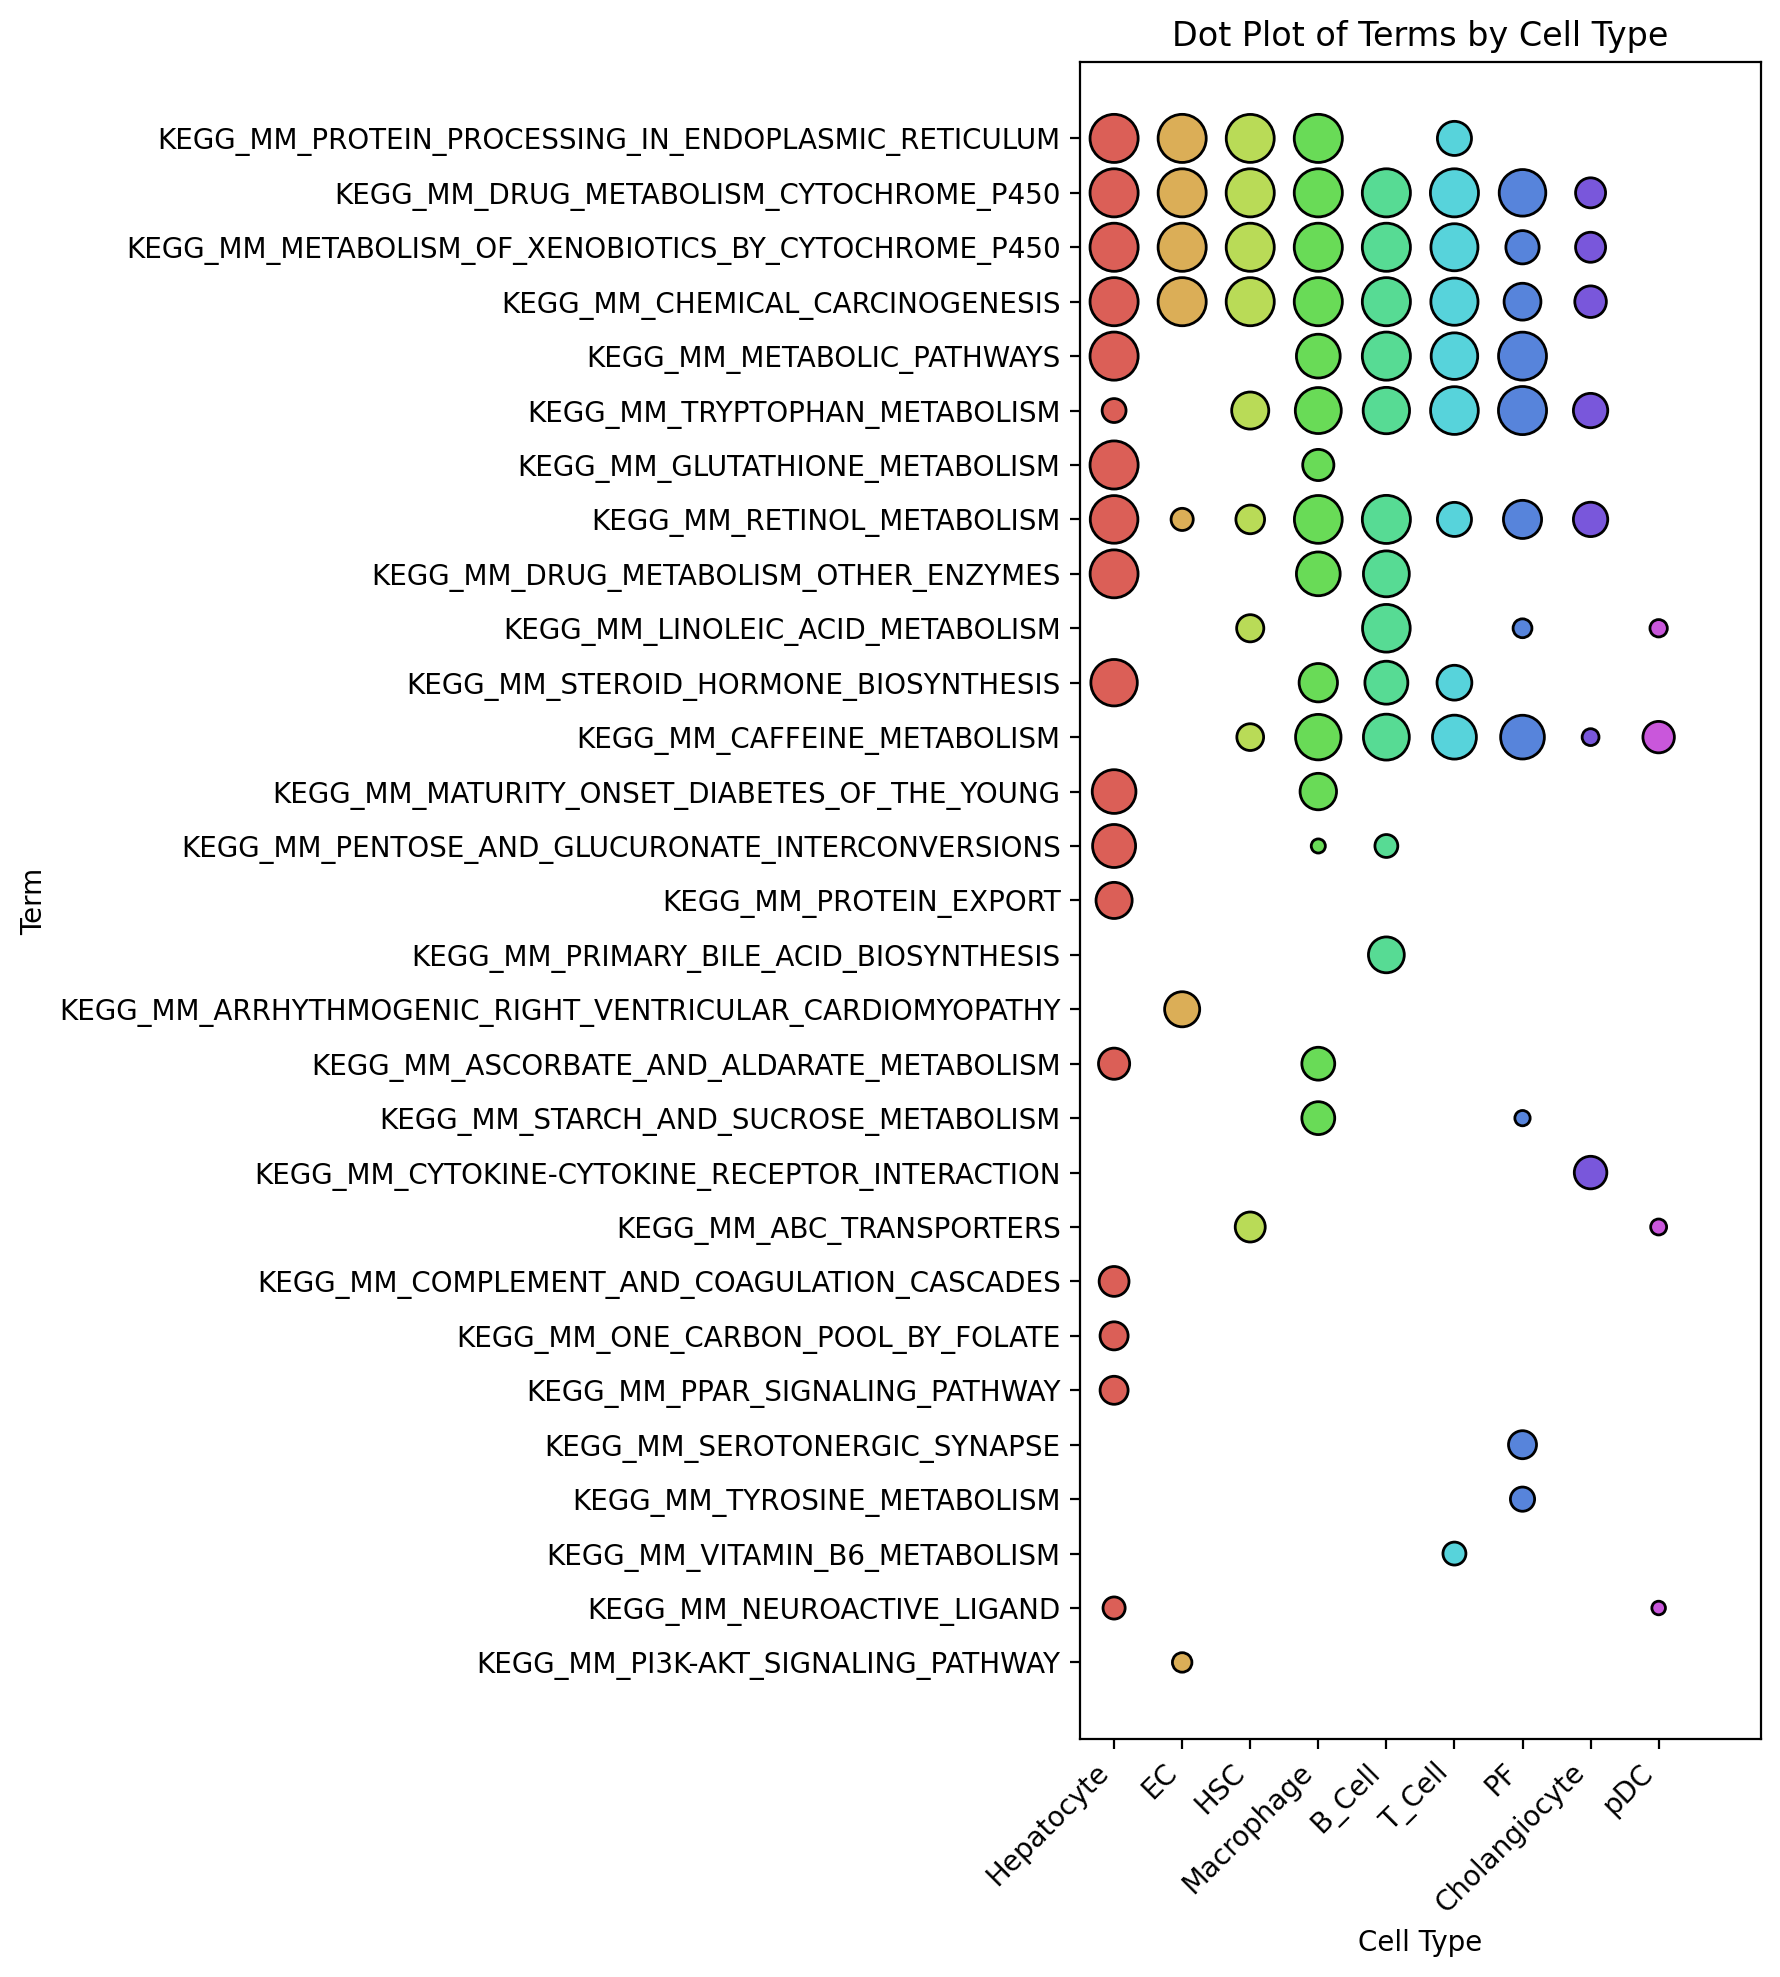

In [9]:
# Create a dot plot
plt.figure(figsize=(9, 10))  # Adjust the figure size as needed
plt.scatter(subset['X_COOR'], 
            subset['Term'], 
            s=subset['Size'], 
            zorder=10, 
            c=subset['Color'], 
            edgecolor='black')#, 
            #alpha=subset['Overlap_Decimal'])
plt.xlabel('Cell Type')
plt.ylabel('Term')
plt.title('Dot Plot of Terms by Cell Type')

# Define the x-axis tick positions and labels based on the mapping dictionary
x_ticks = [celltype_mapping[celltype] for celltype in subset['Celltype'].unique()]
x_labels = [celltype for celltype in subset['Celltype'].unique()]

plt.xticks(x_ticks, x_labels, rotation=45, ha='right')  # Set the x-axis ticks and labels
plt.gca().set_xlim(left=x_ticks[0] - 3.5, right=x_ticks[-1] + 1.5)  # Set x-axis limits

plt.gca().invert_yaxis()  # Invert the y-axis

plt.tight_layout()  # Adjust the layout for better spacing

# Export the plot as a PDF file
plt.savefig('./Figures/Enrichr_All_DEGs_MASTER_Wald.pdf', format='pdf')


plt.show()

## <br> 3B. Plot for Unique to Celltype DEGs for KEGG Terms (Enrichr_Unique_to_Celltype_MASTER_Wald)

In [11]:
subset = Enrichr_Unique_to_Celltype_MASTER_Wald[Enrichr_Unique_to_Celltype_MASTER_Wald['Term'].str.contains('KEGG')]
subset = subset[subset['Adjusted P-value'] <= 0.05]
subset = subset.sort_values('Adjusted P-value')
subset['Size'] = subset['Adjusted P-value'].apply(lambda x: 300 if x == 0 else 10 + ((0.05 - x) / 0.05) * 290)

# Create a mapping dictionary for Celltype to X_COOR values
celltype_mapping = {
    'Hepatocyte': 1,
    'EC': 2,
    'HSC': 3,
    'Macrophage': 4,
    'B_Cell': 5,
    'Cholangiocyte': 6
}

subset['X_COOR'] = subset['Celltype'].map(celltype_mapping)


color_mapping = {
    'Hepatocyte': '#db5f57',
    'EC': '#dbae57',
    'HSC': '#b9db57',
    'Macrophage': '#69db57',
    'B_Cell': '#57db94',
    'T_Cell': '#57d3db',
    'PF': '#5784db',
    'Cholangiocyte': '#7957db',
    'pDC': '#c957db',
    'Neutrophil': '#db579e'
}

subset['Color'] = subset['Celltype'].map(color_mapping)


from fractions import Fraction

subset['Overlap_Decimal'] = subset['Overlap'].apply(lambda x: float(eval(x)) if '/' in x else float(x))

subset

,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Celltype,Size,X_COOR,Color,Overlap_Decimal
7604,KEGG_MM_GLUTATHIONE_METABOLISM,24/47,0.000040,0.009301,2.192312,22.223885,Pgd;Odc1;Gpx5;Gsta1;Gsta3;Gss;Gsto1;Idh2;Gsta4;Anpep;Idh1;Oplah;Gstm4;Ggct;G6pdx;Mgst3;Rrm2;Gstm2;Gstt3;Srm;Gstm6;Ggt6;Gstt1;Gsto2,Hepatocyte,246.056169,1,#db5f57,0.510638
174,KEGG_MM_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SERIES,1/10,0.005467,0.017719,289.476190,1507.896318,St3gal5,B_Cell,197.232292,5,#57db94,0.100000
175,KEGG_MM_METABOLIC_PATHWAYS,3/739,0.004668,0.017719,15.882759,85.244223,St3gal5;Asl;Scp2,B_Cell,197.232292,5,#57db94,0.004060
178,KEGG_MM_PRIMARY_BILE_ACID_BIOSYNTHESIS,1/13,0.007102,0.018749,225.074074,1113.518976,Scp2,B_Cell,191.258247,5,#57db94,0.076923
7674,KEGG_MM_ONE_CARBON_POOL_BY_FOLATE,12/18,0.000127,0.021341,2.868230,25.739454,Ftcd;Mthfd1l;Amt;Shmt2;Aldh1l1;Mthfd2;Mthfd1;Mthfr;Aldh1l2;Tyms;Dhfr;Mthfs,Hepatocyte,176.221040,1,#db5f57,0.666667
171,KEGG_MM_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,1/25,0.013622,0.024476,119.000000,511.229694,Asl,B_Cell,158.038159,5,#57db94,0.040000
172,KEGG_MM_ARGININE_AND_PROLINE_METABOLISM,1/28,0.015247,0.025735,106.438596,445.272736,Asl,B_Cell,150.737103,5,#57db94,0.035714
173,KEGG_MM_ENDOCRINE_AND_OTHER_FACTOR,1/32,0.017410,0.028027,93.297436,377.921961,Esr1,B_Cell,137.444770,5,#57db94,0.031250
177,KEGG_MM_PPAR_SIGNALING_PATHWAY,1/50,0.027096,0.037173,59.924092,216.228865,Scp2,B_Cell,84.395479,5,#57db94,0.020000
176,KEGG_MM_PEROXISOME,1/66,0.035641,0.045848,45.426065,151.462045,Scp2,B_Cell,34.082374,5,#57db94,0.015152


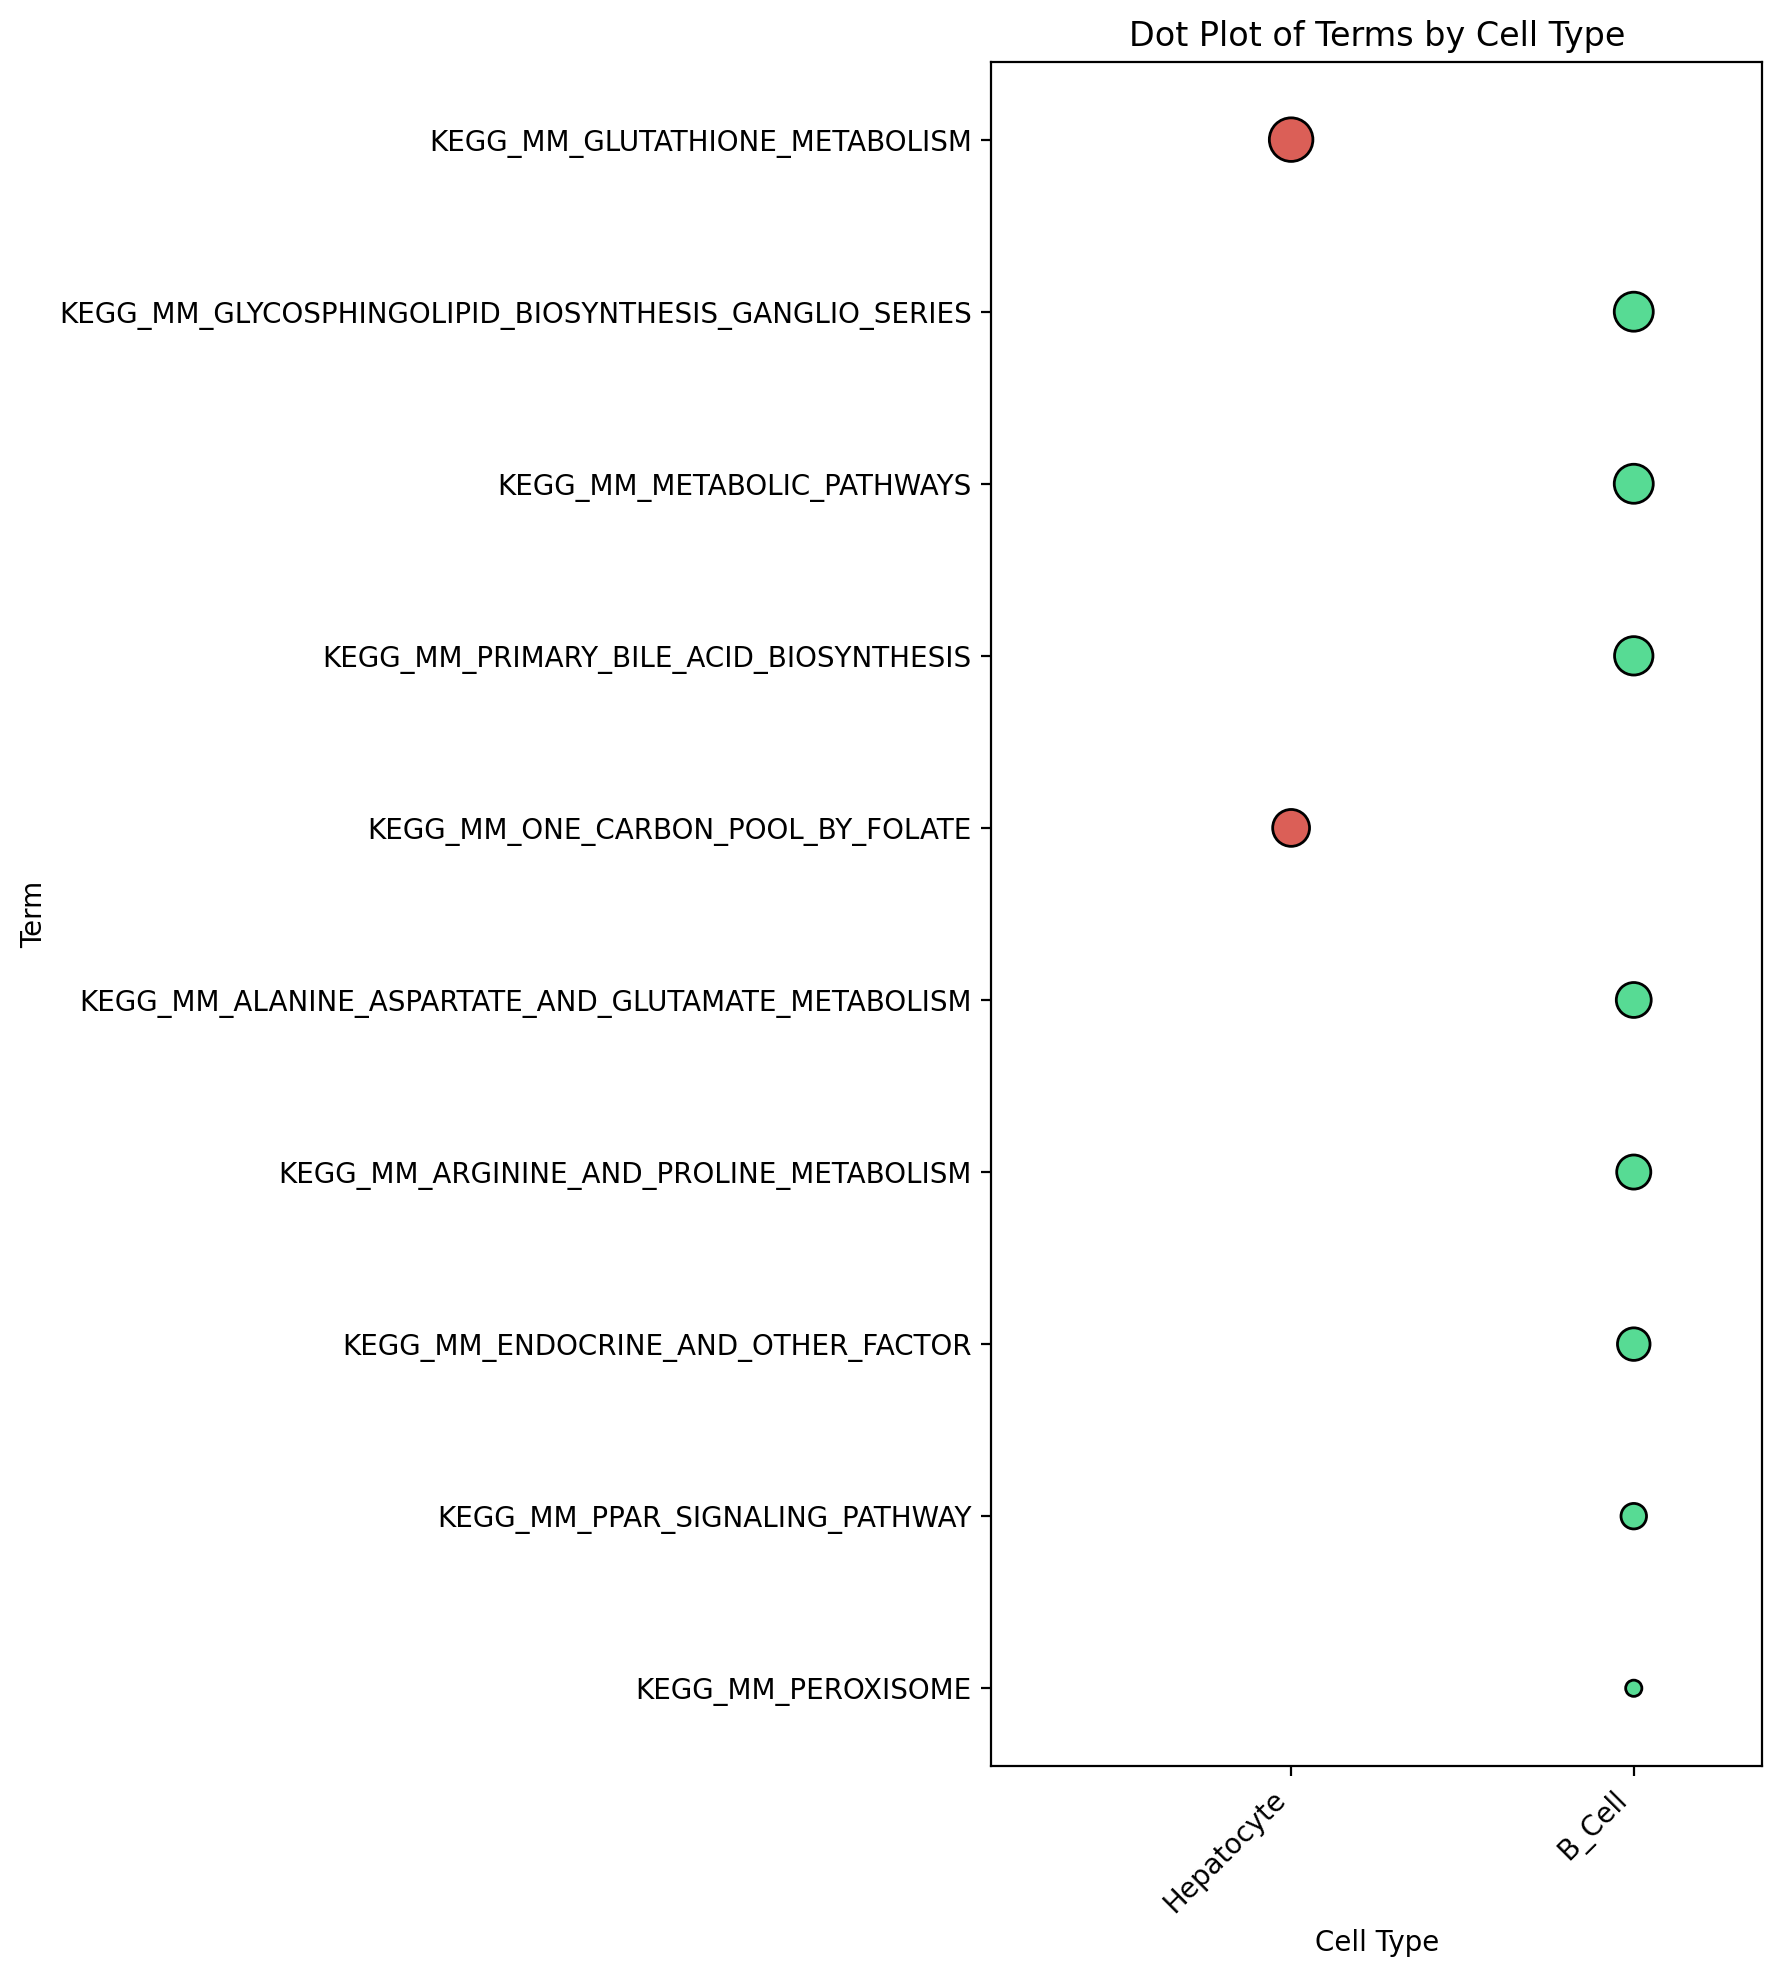

In [12]:
# Create a dot plot
plt.figure(figsize=(9, 10))  # Adjust the figure size as needed
plt.scatter(subset['X_COOR'], 
            subset['Term'], 
            s=subset['Size'], 
            zorder=10, 
            c=subset['Color'], 
            edgecolor='black')#, 
            #alpha=subset['Overlap_Decimal'])
plt.xlabel('Cell Type')
plt.ylabel('Term')
plt.title('Dot Plot of Terms by Cell Type')

# Define the x-axis tick positions and labels based on the mapping dictionary
x_ticks = [celltype_mapping[celltype] for celltype in subset['Celltype'].unique()]
x_labels = [celltype for celltype in subset['Celltype'].unique()]

plt.xticks(x_ticks, x_labels, rotation=45, ha='right')  # Set the x-axis ticks and labels
plt.gca().set_xlim(left=x_ticks[0] - 3.5, right=x_ticks[-1] + 1.5)  # Set x-axis limits

plt.gca().invert_yaxis()  # Invert the y-axis

plt.tight_layout()  # Adjust the layout for better spacing

# Export the plot as a PDF file
plt.savefig('./Figures/Enrichr_Unique_to_Celltype_MASTER_Wald.pdf', format='pdf')


plt.show()

## <br> 4A. Plot for All DEGs for GO_BP (Enrichr_All_DEGs_MASTER_Wald)

In [22]:
subset = Enrichr_All_DEGs_MASTER_Wald[Enrichr_All_DEGs_MASTER_Wald['Term'].str.contains('KEGG')]
subset = subset[subset['Adjusted P-value'] <= 0.05]
subset = subset.sort_values('Adjusted P-value')
subset['Size'] = subset['Adjusted P-value'].apply(lambda x: 300 if x == 0 else 10 + ((0.05 - x) / 0.05) * 290)

# Create a mapping dictionary for Celltype to X_COOR values
celltype_mapping = {
    'Hepatocyte': 1,
    'EC': 2,
    'HSC': 3,
    'Macrophage': 4,
    'B_Cell': 5,
    'T_Cell': 6,
    'PF': 7,
    'Cholangiocyte': 8,
    'pDC': 9,
}

subset['X_COOR'] = subset['Celltype'].map(celltype_mapping)


color_mapping = {
    'Hepatocyte': '#db5f57',
    'EC': '#dbae57',
    'HSC': '#b9db57',
    'Macrophage': '#69db57',
    'B_Cell': '#57db94',
    'T_Cell': '#57d3db',
    'PF': '#5784db',
    'Cholangiocyte': '#7957db',
    'pDC': '#c957db',
    'Neutrophil': '#db579e'
}

subset['Color'] = subset['Celltype'].map(color_mapping)


from fractions import Fraction

subset['Overlap_Decimal'] = subset['Overlap'].apply(lambda x: float(eval(x)) if '/' in x else float(x))
subset[['Overlap_Numerator', 'Overlap_Denominator']] = subset['Overlap'].str.split('/', expand=True).astype(float)


subset = subset[subset['Overlap_Denominator'] >= 10]

#subset = subset[subset['Overlap_Decimal'] >= 0.25]

subset


#subset.to_csv('./Results/All_DEGs_GO_BP_subset.txt', sep='\t', index=False)

,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Celltype,Size,X_COOR,Color,Overlap_Decimal,Overlap_Numerator,Overlap_Denominator
36820,KEGG_MM_PROTEIN_PROCESSING_IN_ENDOPLASMIC_RETICULUM,18/135,6.179575e-13,5.821159e-10,10.568099,297.094156,Sel1l;Syvn1;Dnajb11;Hspa5;Pdia4;Pdia3;Nfe2l2;Man1a;Eif2ak3;Pdia6;Hyou1;Txndc5;P4hb;Sec23b;Hsp90b1;Edem1;Sec24d;Dnajc3,Macrophage,299.999997,4,#69db57,0.133333,18.0,135.0
12114,KEGG_MM_DRUG_METABOLISM_CYTOCHROME_P450,52/79,1.888571e-12,1.445027e-09,2.395621,64.670257,Cyp2c23;Cyp1a2;Cyp2d26;Cyp3a13;Ugt2b38;Gsta1;Aox1;Fmo6;Ugt2b37;Gsta3;Gstp2;Cyp2c40;Fmo1;Ugt2b35;Gsto1;Cyp2a4;Ugt1a1;Gsta4;Cyp2c68;Gstp1;Aldh3b1;Cyp2e1;Ugt2b5;Fmo3;Cyp2c39;Cyp2c55;Gstm4;Ugt2a3;Adh4...,Hepatocyte,299.999992,1,#db5f57,0.658228,52.0,79.0
12189,KEGG_MM_METABOLISM_OF_XENOBIOTICS_BY_CYTOCHROME_P450,52/80,3.942973e-12,2.879804e-09,2.365723,62.121737,Cyp2c23;Cyp1a2;Cyp2d26;Cyp3a13;Dhdh;Ugt2b38;Gsta1;Ugt2b37;Gstp2;Gsta3;Cyp2c40;Ephx1;Ugt2b35;Cyp1a1;Cbr1;Gsto1;Cyp2a4;Ugt1a1;Gsta4;Cyp2c68;Gstp1;Aldh3b1;Cyp2e1;Ugt2b5;Cyp2c39;Cyp2c55;Gstm4;Ugt2a3;A...,Hepatocyte,299.999983,1,#db5f57,0.650000,52.0,80.0
12094,KEGG_MM_CHEMICAL_CARCINOGENESIS,51/79,9.340225e-12,6.003150e-09,2.349493,59.669355,Cyp2c23;Cyp1a2;Cyp3a13;Ugt2b38;Gsta1;Ugt2b37;Gstp2;Gsta3;Cyp2c40;Ephx1;Ugt2b35;Cyp1a1;Cbr1;Gsto1;Cyp2a4;Ugt1a1;Gsta4;Cyp2c68;Gstp1;Aldh3b1;Cyp2e1;Ugt2b5;Kyat1;Cyp2c39;Cyp2c55;Gstm4;Ugt2a3;Adh4;Ugt...,Hepatocyte,299.999965,1,#db5f57,0.645570,51.0,79.0
1146,KEGG_MM_DRUG_METABOLISM_CYTOCHROME_P450,11/55,1.894898e-10,7.679075e-08,16.000805,358.204996,Cyp1a2;Fmo2;Cyp2c37;Cyp2c70;Aox1;Gstm1;Cyp2a5;Gstp2;Fmo3;Fmo1;Cyp3a11,B_Cell,299.999555,5,#57db94,0.200000,11.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39304,KEGG_MM_LINOLEIC_ACID_METABOLISM,1/13,2.115121e-02,4.498356e-02,74.975309,289.109158,Cyp1a2,pDC,39.095379,9,#c957db,0.076923,1.0,13.0
39298,KEGG_MM_ABC_TRANSPORTERS,1/14,2.276328e-02,4.603466e-02,69.781609,263.956379,Abcd3,pDC,32.998944,9,#c957db,0.071429,1.0,14.0
40141,KEGG_MM_STARCH_AND_SUCROSE_METABOLISM,2/22,5.628350e-03,4.649082e-02,22.407407,116.069002,Ugdh;Gbe1,PF,30.353231,7,#5784db,0.090909,2.0,22.0
36808,KEGG_MM_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS,3/20,2.747796e-03,4.727714e-02,12.088559,71.285703,Ugdh;Ugt2a3;Ugt1a10,Macrophage,25.792583,4,#69db57,0.150000,3.0,20.0


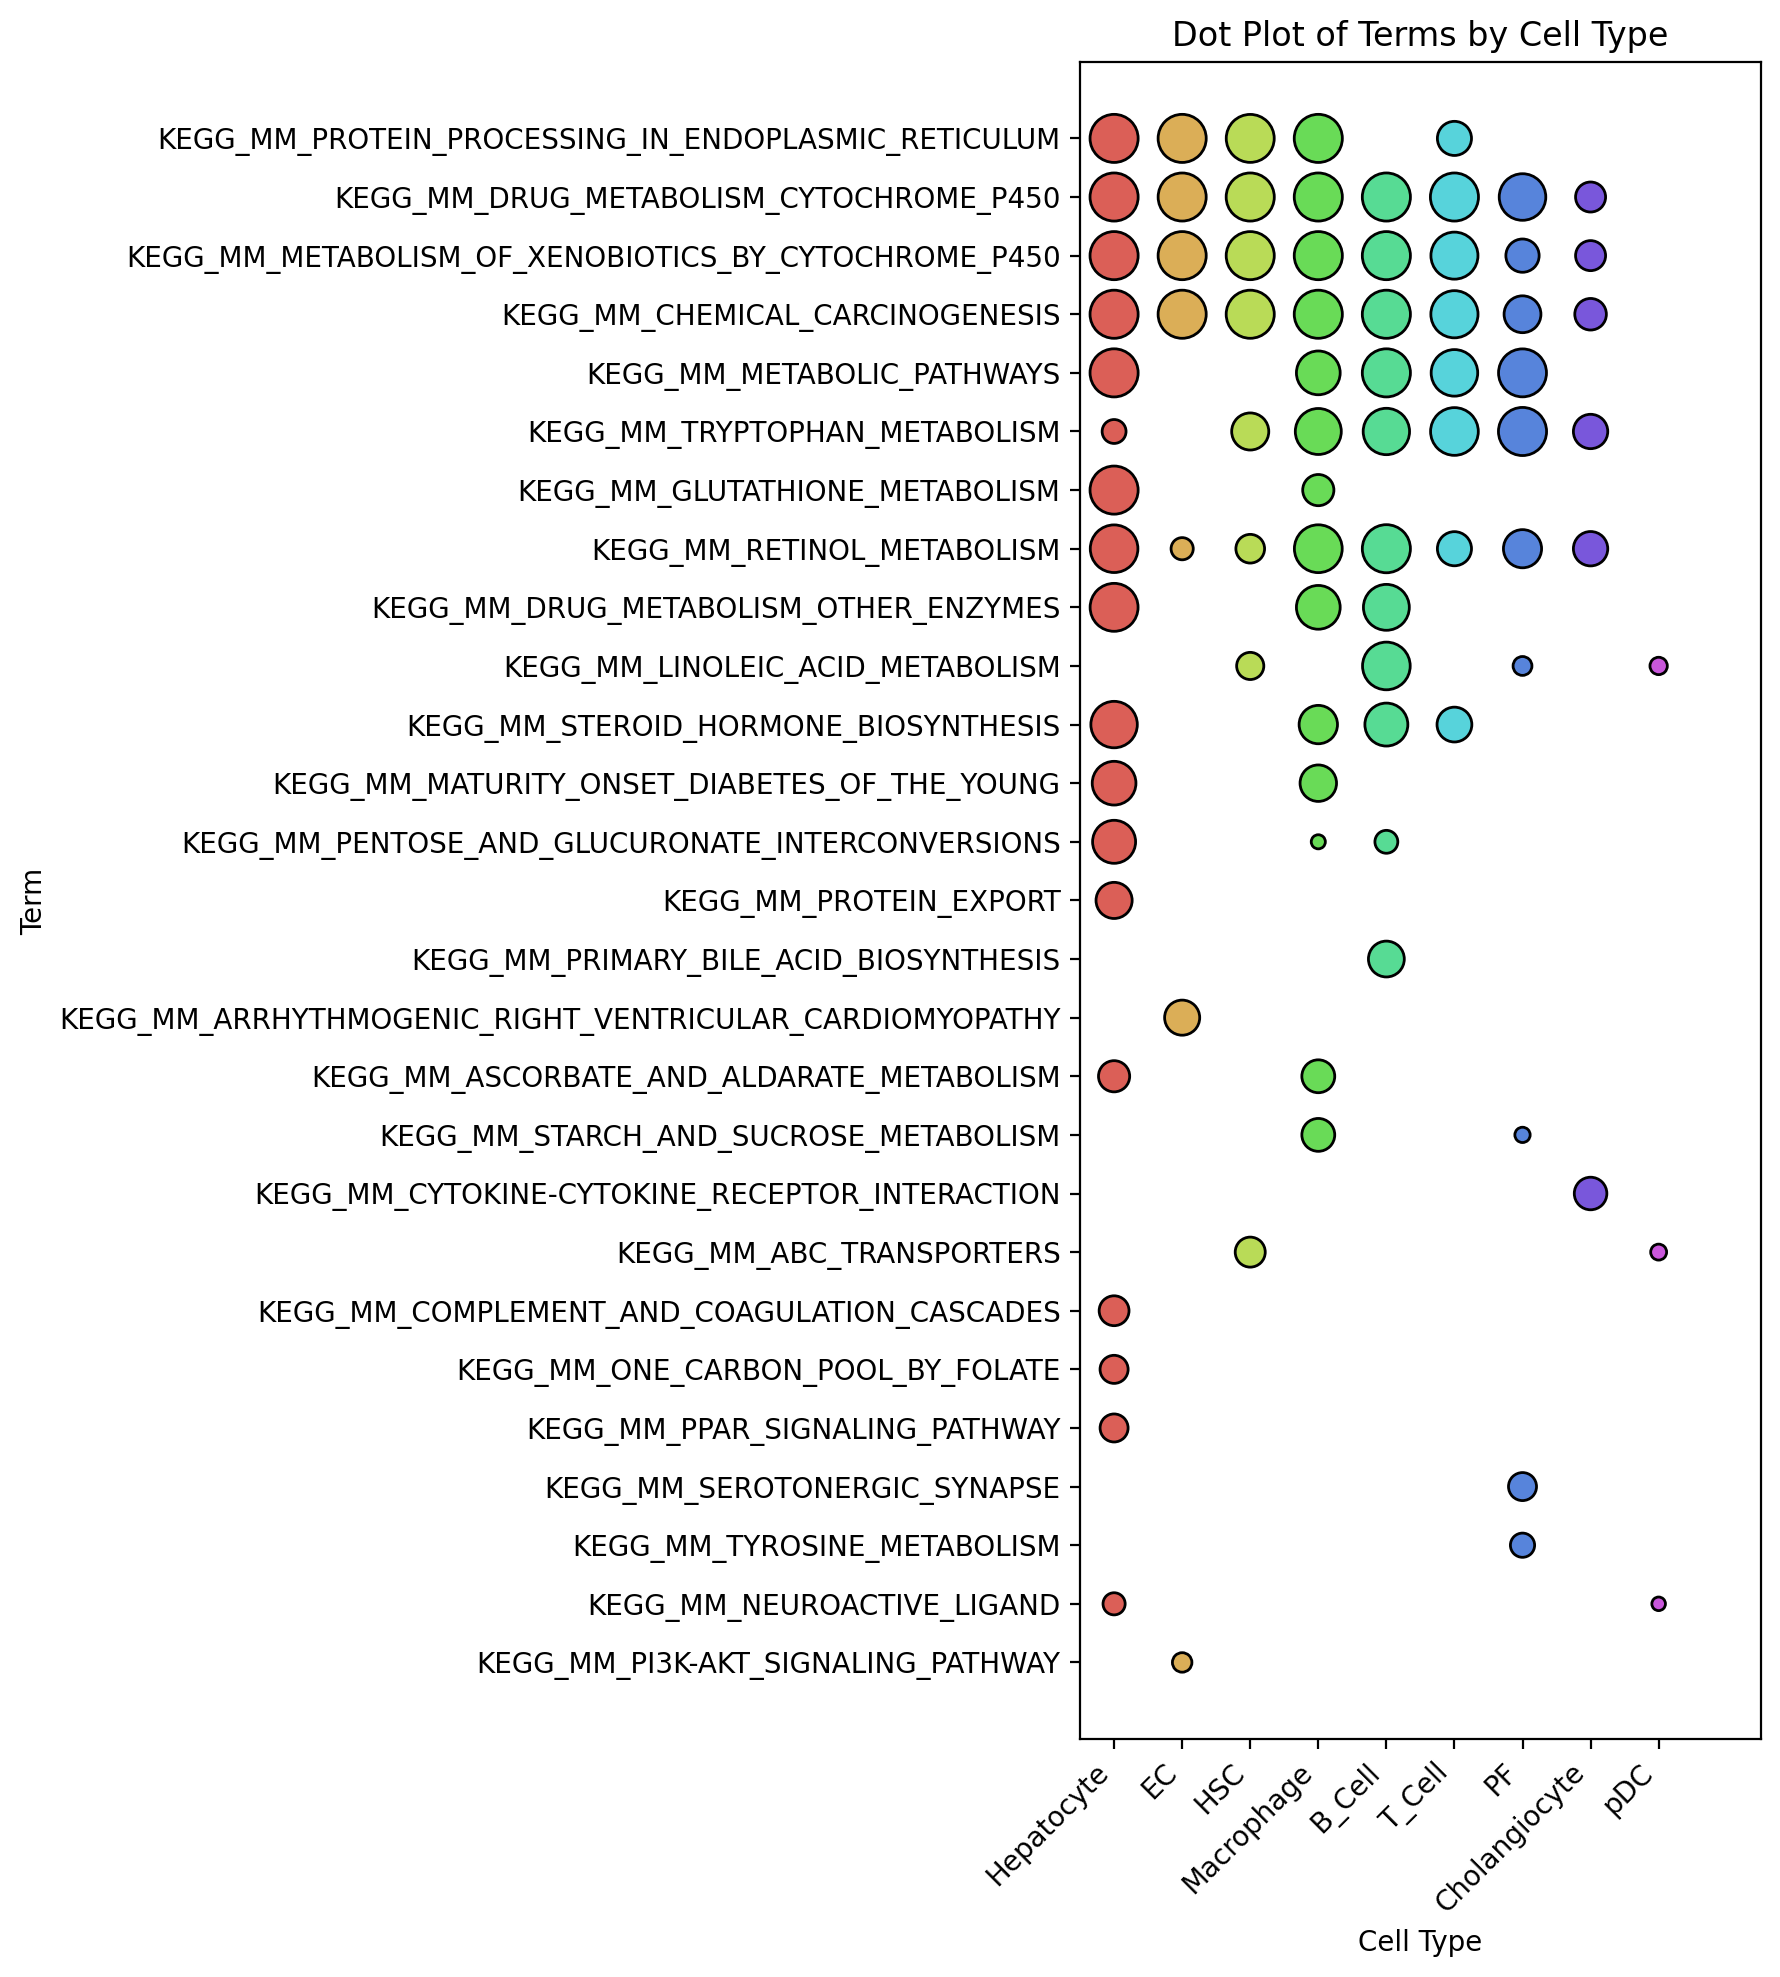

In [23]:
# Create a dot plot
plt.figure(figsize=(9, 10))  # Adjust the figure size as needed
plt.scatter(subset['X_COOR'], 
            subset['Term'], 
            s=subset['Size'], 
            zorder=10, 
            c=subset['Color'], 
            edgecolor='black')#, 
            #alpha=subset['Overlap_Decimal'])
plt.xlabel('Cell Type')
plt.ylabel('Term')
plt.title('Dot Plot of Terms by Cell Type')

# Define the x-axis tick positions and labels based on the mapping dictionary
x_ticks = [celltype_mapping[celltype] for celltype in subset['Celltype'].unique()]
x_labels = [celltype for celltype in subset['Celltype'].unique()]

plt.xticks(x_ticks, x_labels, rotation=45, ha='right')  # Set the x-axis ticks and labels
plt.gca().set_xlim(left=x_ticks[0] - 3.5, right=x_ticks[-1] + 1.5)  # Set x-axis limits

plt.gca().invert_yaxis()  # Invert the y-axis

plt.tight_layout()  # Adjust the layout for better spacing

# Export the plot as a PDF file
#plt.savefig('./Figures/Enrichr_All_DEGs_MASTER_Wald.pdf', format='pdf')


plt.show()